# Data exploration

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
%matplotlib inline

In [3]:
# loading the data
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [6]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [10]:
# Hence, we come to know that 'count' is our target variable
# Datatypes of the columns
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
dtype: object

# Univariate analysis

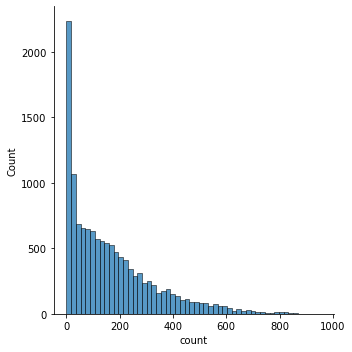

In [28]:
# distribution of count variable
sns.displot(train["count"])

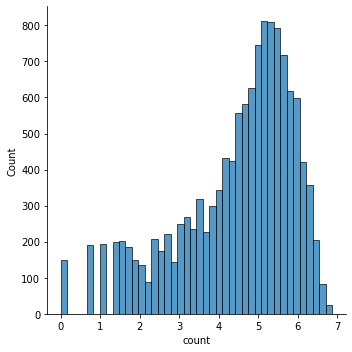

In [29]:
# Now, it is seen that the distribution is right skewed hence we take the log of the variable
sns.displot(np.log(train["count"]))

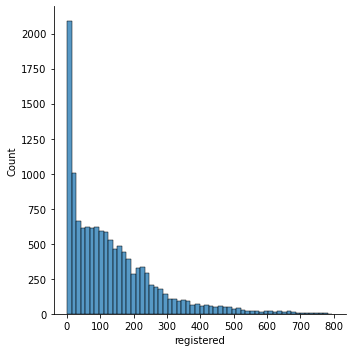

In [30]:
# Now it is necessary to find out which variable affects the target variable the most
sns.displot(train["registered"])

# Bivariate analysis

In [31]:
# Now, at first we look at the correlation between the numerical variables
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()

<AxesSubplot:>

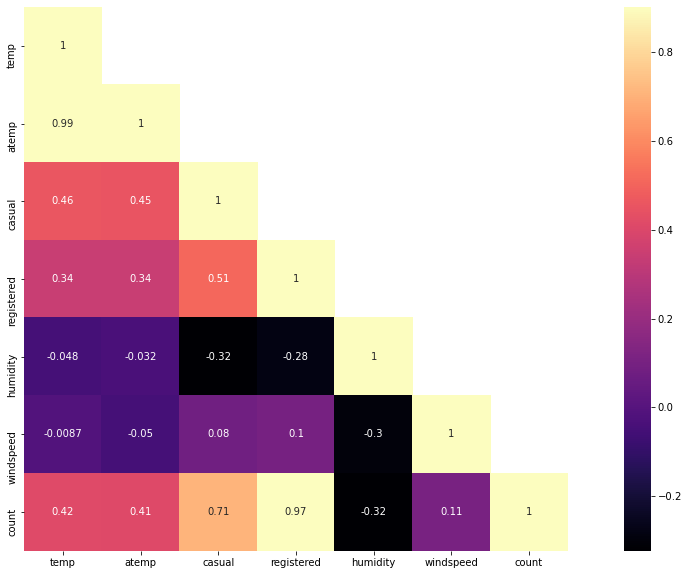

In [35]:
corr_arr = np.array(corr)
corr_arr[np.tril_indices_from(corr_arr)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corr, mask=corr_arr, vmax=0.9, square=True, annot=True, cmap="magma")

In [36]:
# Looking for missing values in the dataset
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [37]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [38]:
# extracting date, hour and month from the datetime
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [39]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [40]:
training = train[train["datetime"]<="2012-03-30 00:00:00"]
validation = train[train["datetime"]>"2012-03-30 00:00:00"]

In [41]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

# Model building

In [45]:
# linear regression model
from sklearn.linear_model import LinearRegression

In [46]:
lreg = LinearRegression()

In [47]:
X_train = training.drop('count', 1)
y_train = np.log(training['count'])
X_test = validation.drop('count', 1)
y_test = np.log(validation['count'])

In [48]:
# Checking the shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10773, 11), (10773,), (2207, 11), (2207,))

In [49]:
lreg.fit(X_train, y_train)

LinearRegression()

In [51]:
# making prediction on the validation set
pred = lreg.predict(X_test)

In [52]:
# defining the function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y)  # taking the exponent as we took the log of the variable
    y_ = np.exp(y_)
    log_a = np.nan_to_num(np.array([np.log(x+1) for x in y]))
    log_b = np.nan_to_num(np.array([np.log(x+1) for x in y_]))
    square = (log_a - log_b) ** 2
    ans = np.sqrt(np.mean(square))
    return ans

In [53]:
rmsle(y_test, pred)

0.8876469542289637

In [56]:
test_prediction = lreg.predict(test)
print(test_prediction)

[3.25020161 3.26666189 3.05708414 ... 4.30200224 4.1438553  4.08274552]


# Decision tree

In [57]:
# To reduce the rmsle value, we use decision tree
from sklearn.tree import DecisionTreeRegressor

In [58]:
dtreg = DecisionTreeRegressor(max_depth=5)

In [59]:
# Fitting the decision tree
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [60]:
predict = dtreg.predict(X_test)

In [61]:
rmsle(y_test, predict)

0.1713433894766923

In [62]:
test_pred = dtreg.predict(test)
print(test_pred)

[4.20971721 4.20971721 3.10092477 ... 4.54557822 4.13208764 4.13208764]


In [63]:
final_prediction = np.exp(test_pred)
# store this in a csv file
submission_new = pd.DataFrame()

In [64]:
submission_new["count"] = final_prediction

In [67]:
submission_new.to_csv('submission_new.csv', header=True, index=False)